In [1]:
NAME="ANDREW BONAFEDE"

# Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different
dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include
different dataset sizes, task difficulties) plots.

In [ ]:
# Import my version of d3rlpy
!pip install git+"https://github.com/abonafede/d3rlpy.git"

In [12]:
# All other necessary imports
from d3rlpy.algos.cql import DiscreteCQL
from d3rlpy.metrics.scorer import average_value_estimation_scorer, true_q_scorer
from d3rlpy.datasets import get_cartpole
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

In [13]:
# Clear Logs
shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)

# Using Cartpole (my favorite)
NOTE: I am using the average value estimation as my Estimated Q scorer, as opposed to the initial state value estimation.

In [14]:
# Get Cartpole Dataset and Environment
dataset, env = get_cartpole()

# Split into training episodes and testing episodes
train_episodes, eval_episodes = train_test_split(dataset,test_size=0.2,random_state=0)

# Instantiate our CQL
cql = DiscreteCQL()

# Fit our CQL
result = cql.fit(
   train_episodes,
   eval_episodes = eval_episodes,
   n_epochs=20,
   scorers={
       "estimated_q": average_value_estimation_scorer,
       'true_q': true_q_scorer},
   experiment_name="hw3cartpole")

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


2023-03-23 01:23:22 [debug    ] RoundIterator is selected.
2023-03-23 01:23:22 [info     ] Directory is created at d3rlpy_logs/hw3cartpole_20230323012322
2023-03-23 01:23:22 [debug    ] Building models...
2023-03-23 01:23:22 [debug    ] Models have been built.
2023-03-23 01:23:22 [info     ] Parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DiscreteCQL', 'observation

Epoch 1/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:23:41 [info     ] hw3cartpole_20230323012322: epoch=1 step=2489 epoch=1 metrics={'time_sample_batch': 0.0002057674947442085, 'time_algorithm_update': 0.006972649721028385, 'loss': 0.6859371827615223, 'time_step': 0.007347658869251758, 'estimated_q': 1.0944116317212451, 'true_q': 2.0497076511383057} step=2489
2023-03-23 01:23:41 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_2489.pt


Epoch 2/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:24:00 [info     ] hw3cartpole_20230323012322: epoch=2 step=4978 epoch=2 metrics={'time_sample_batch': 0.00018917848518834433, 'time_algorithm_update': 0.0064858235044621135, 'loss': 0.6664727844833706, 'time_step': 0.006812267966326004, 'estimated_q': 1.095008805976319, 'true_q': 2.015350341796875} step=4978
2023-03-23 01:24:00 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_4978.pt


Epoch 3/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:24:19 [info     ] hw3cartpole_20230323012322: epoch=3 step=7467 epoch=3 metrics={'time_sample_batch': 0.00022330088709290606, 'time_algorithm_update': 0.0067583070121265505, 'loss': 0.6644256705498303, 'time_step': 0.007123697805040665, 'estimated_q': 1.104403861302148, 'true_q': 2.0036404132843018} step=7467
2023-03-23 01:24:19 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_7467.pt


Epoch 4/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:24:39 [info     ] hw3cartpole_20230323012322: epoch=4 step=9956 epoch=4 metrics={'time_sample_batch': 0.00020913073891087582, 'time_algorithm_update': 0.007132977163422869, 'loss': 0.6757179150000879, 'time_step': 0.007499617139418569, 'estimated_q': 2.1646971291449764, 'true_q': 3.015659809112549} step=9956
2023-03-23 01:24:39 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_9956.pt


Epoch 5/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:25:00 [info     ] hw3cartpole_20230323012322: epoch=5 step=12445 epoch=5 metrics={'time_sample_batch': 0.0002748880007028484, 'time_algorithm_update': 0.0071680231619283535, 'loss': 0.6740610470442275, 'time_step': 0.007596134995781978, 'estimated_q': 2.14298388432026, 'true_q': 3.027176856994629} step=12445
2023-03-23 01:25:00 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_12445.pt


Epoch 6/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:25:18 [info     ] hw3cartpole_20230323012322: epoch=6 step=14934 epoch=6 metrics={'time_sample_batch': 0.00020850523737550692, 'time_algorithm_update': 0.006455759295214128, 'loss': 0.6734237525778249, 'time_step': 0.00680529836575733, 'estimated_q': 2.156284068206736, 'true_q': 3.0027592182159424} step=14934
2023-03-23 01:25:18 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_14934.pt


Epoch 7/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:25:38 [info     ] hw3cartpole_20230323012322: epoch=7 step=17423 epoch=7 metrics={'time_sample_batch': 0.0002056298460908662, 'time_algorithm_update': 0.006778108110960443, 'loss': 0.6841164863507112, 'time_step': 0.007130248712315144, 'estimated_q': 3.206660141941559, 'true_q': 4.06322717666626} step=17423
2023-03-23 01:25:38 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_17423.pt


Epoch 8/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:25:57 [info     ] hw3cartpole_20230323012322: epoch=8 step=19912 epoch=8 metrics={'time_sample_batch': 0.0002274356150828293, 'time_algorithm_update': 0.006748454644527719, 'loss': 0.687296831353978, 'time_step': 0.007131810263008801, 'estimated_q': 3.2107376988508656, 'true_q': 4.069144248962402} step=19912
2023-03-23 01:25:57 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_19912.pt


Epoch 9/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:26:16 [info     ] hw3cartpole_20230323012322: epoch=9 step=22401 epoch=9 metrics={'time_sample_batch': 0.00020413668867381714, 'time_algorithm_update': 0.006724165356652523, 'loss': 0.6865726806352109, 'time_step': 0.007083715038062004, 'estimated_q': 3.220164395005954, 'true_q': 4.052021026611328} step=22401
2023-03-23 01:26:16 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_22401.pt


Epoch 10/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:26:40 [info     ] hw3cartpole_20230323012322: epoch=10 step=24890 epoch=10 metrics={'time_sample_batch': 0.0002659553023599247, 'time_algorithm_update': 0.008194376063088232, 'loss': 0.692694970861215, 'time_step': 0.008644518674066527, 'estimated_q': 4.25336888371318, 'true_q': 5.088517189025879} step=24890
2023-03-23 01:26:40 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_24890.pt


Epoch 11/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:27:01 [info     ] hw3cartpole_20230323012322: epoch=11 step=27379 epoch=11 metrics={'time_sample_batch': 0.00024167453969707925, 'time_algorithm_update': 0.007291699471172917, 'loss': 0.6987786020270884, 'time_step': 0.007704252888276041, 'estimated_q': 4.235542778014091, 'true_q': 5.0566582679748535} step=27379
2023-03-23 01:27:01 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_27379.pt


Epoch 12/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:27:19 [info     ] hw3cartpole_20230323012322: epoch=12 step=29868 epoch=12 metrics={'time_sample_batch': 0.00021205431201363147, 'time_algorithm_update': 0.0065784910300880515, 'loss': 0.6984287731232726, 'time_step': 0.006945135603951086, 'estimated_q': 4.228189377485815, 'true_q': 5.070633888244629} step=29868
2023-03-23 01:27:19 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_29868.pt


Epoch 13/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:27:39 [info     ] hw3cartpole_20230323012322: epoch=13 step=32357 epoch=13 metrics={'time_sample_batch': 0.00023464315528609083, 'time_algorithm_update': 0.006907724769012954, 'loss': 0.7020593104998526, 'time_step': 0.007303842438804715, 'estimated_q': 5.275018066815321, 'true_q': 6.062664985656738} step=32357
2023-03-23 01:27:39 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_32357.pt


Epoch 14/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:27:58 [info     ] hw3cartpole_20230323012322: epoch=14 step=34846 epoch=14 metrics={'time_sample_batch': 0.0002263504226028608, 'time_algorithm_update': 0.006684756460990615, 'loss': 0.7127295744711254, 'time_step': 0.007071935780894187, 'estimated_q': 5.267920769280305, 'true_q': 6.082120418548584} step=34846
2023-03-23 01:27:58 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_34846.pt


Epoch 15/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:28:18 [info     ] hw3cartpole_20230323012322: epoch=15 step=37335 epoch=15 metrics={'time_sample_batch': 0.00024273980808526267, 'time_algorithm_update': 0.006926155320225398, 'loss': 0.711887044545492, 'time_step': 0.007332034549736124, 'estimated_q': 5.244104001967346, 'true_q': 6.0808000564575195} step=37335
2023-03-23 01:28:18 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_37335.pt


Epoch 16/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:28:38 [info     ] hw3cartpole_20230323012322: epoch=16 step=39824 epoch=16 metrics={'time_sample_batch': 0.00022259147447867297, 'time_algorithm_update': 0.006753416701271238, 'loss': 0.7116790082905847, 'time_step': 0.007139812084794188, 'estimated_q': 5.2859513539823135, 'true_q': 6.069080829620361} step=39824
2023-03-23 01:28:38 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_39824.pt


Epoch 17/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:28:58 [info     ] hw3cartpole_20230323012322: epoch=17 step=42313 epoch=17 metrics={'time_sample_batch': 0.00021311134255617295, 'time_algorithm_update': 0.006888396963147861, 'loss': 0.725516605923194, 'time_step': 0.007272144837185962, 'estimated_q': 6.289295172985982, 'true_q': 7.0791239738464355} step=42313
2023-03-23 01:28:58 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_42313.pt


Epoch 18/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:29:17 [info     ] hw3cartpole_20230323012322: epoch=18 step=44802 epoch=18 metrics={'time_sample_batch': 0.00023038572171166414, 'time_algorithm_update': 0.00684949536551525, 'loss': 0.724159532040657, 'time_step': 0.007243413722098424, 'estimated_q': 6.312803189332015, 'true_q': 7.127051830291748} step=44802
2023-03-23 01:29:17 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_44802.pt


Epoch 19/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:29:36 [info     ] hw3cartpole_20230323012322: epoch=19 step=47291 epoch=19 metrics={'time_sample_batch': 0.0001994581670826245, 'time_algorithm_update': 0.006648329952817789, 'loss': 0.7239565889535539, 'time_step': 0.0070097047959814685, 'estimated_q': 6.292634320111776, 'true_q': 7.0948872566223145} step=47291
2023-03-23 01:29:36 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_47291.pt


Epoch 20/20:   0%|          | 0/2489 [00:00<?, ?it/s]

2023-03-23 01:29:56 [info     ] hw3cartpole_20230323012322: epoch=20 step=49780 epoch=20 metrics={'time_sample_batch': 0.00021205115097983862, 'time_algorithm_update': 0.007048924700138127, 'loss': 0.7322113497422947, 'time_step': 0.007429175129756721, 'estimated_q': 7.2949027006954505, 'true_q': 8.068647384643555} step=49780
2023-03-23 01:29:56 [info     ] Model parameters are saved to d3rlpy_logs/hw3cartpole_20230323012322/model_49780.pt


# Plot the Results

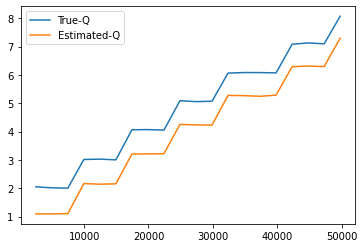

In [16]:
true_q = pd.read_csv("/content/d3rlpy_logs/hw3cartpole_20230323012322/true_q.csv",names=['Index','Step','Value'])
estimated_q = pd.read_csv("/content/d3rlpy_logs/hw3cartpole_20230323012322/estimated_q.csv",names=['Index','Step','Value'])

plt.plot(true_q['Step'],true_q['Value'])
plt.plot(estimated_q['Step'],estimated_q['Value'])
plt.legend(['True-Q','Estimated-Q'])
